In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Paths (adjust if needed)
emopia_label_path = "EMOPIA_1.0/label.csv"
emopia_metadata_path = "EMOPIA_1.0/metadata_by_song.csv"
maestro_path = "maestro-v3.0.0.csv"

# Optional FMA
fma_tracks_path = "fma_metadata/tracks.csv"
fma_genres_path = "fma_metadata/genres.csv"
fma_features_path = "fma_metadata/features.csv"
fma_echonest_path = "fma_metadata/echonest.csv"


In [2]:
# ----- EMOPIA -----
emopia_labels = pd.read_csv(emopia_label_path)
emopia_metadata = pd.read_csv(emopia_metadata_path)

print("EMOPIA label.csv shape:", emopia_labels.shape)
print("EMOPIA metadata_by_song.csv shape:", emopia_metadata.shape)

# ----- MAESTRO -----
# Columns should be: canonical_composer, canonical_title, split, year, midi_filename, audio_filename, duration
maestro_df = pd.read_csv(maestro_path)
print("MAESTRO metadata shape:", maestro_df.shape)

# ----- Optional: FMA -----
try:
    fma_tracks = pd.read_csv(fma_tracks_path, index_col=0)
    fma_genres = pd.read_csv(fma_genres_path)
    fma_features = pd.read_csv(fma_features_path, index_col=0)
    fma_echonest = pd.read_csv(fma_echonest_path, index_col=0)
    has_fma = True
    print("FMA tracks shape:", fma_tracks.shape)
    print("FMA features shape:", fma_features.shape)
except FileNotFoundError:
    has_fma = False
    print("FMA metadata not found (skipping FMA section).")


EMOPIA label.csv shape: (1078, 3)
EMOPIA metadata_by_song.csv shape: (387, 6)
MAESTRO metadata shape: (1276, 7)
FMA metadata not found (skipping FMA section).


In [3]:
emopia_labels.head()

,ID,4Q,annotator
0,Q1_0vLPYiPN7qY_0,1,D
1,Q1_0vLPYiPN7qY_1,1,D
2,Q1_0vLPYiPN7qY_2,1,D
3,Q1_1Qc15G0ZHIg_1,1,D
4,Q1_1Qc15G0ZHIg_2,1,D


In [4]:
print(emopia_labels.info())
print("\nBasic statistics (numeric columns):")
display(emopia_labels.describe(include="number"))

print("\nCategorical summary:")
display(emopia_labels.describe(include="object"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1078 non-null   object
 1   4Q         1078 non-null   int64 
 2   annotator  1078 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.4+ KB
None

Basic statistics (numeric columns):


,4Q
count,1078.000000
mean,2.577922
std,1.133173
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000



Categorical summary:


,ID,annotator
count,1078,1078
unique,1078,4
top,Q1_0vLPYiPN7qY_0,C
freq,1,546


4Q emotion distribution (counts):
4Q
1    250
2    265
3    253
4    310
Name: count, dtype: int64

4Q emotion distribution (percentage):
4Q
1    23.19
2    24.58
3    23.47
4    28.76
Name: count, dtype: float64


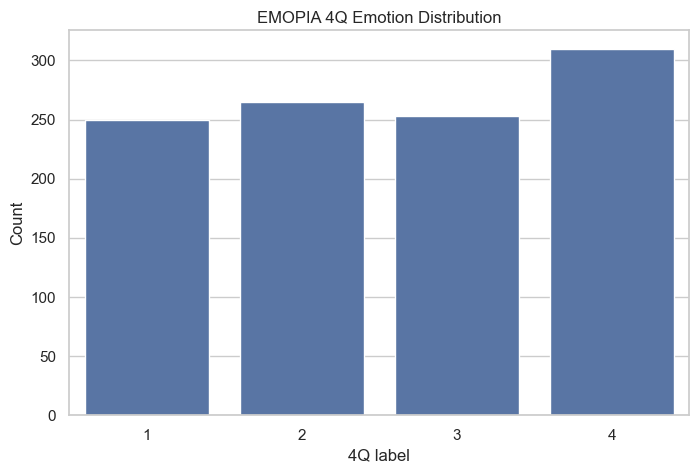

In [5]:
if "4Q" in emopia_labels.columns:
    emo_counts = emopia_labels["4Q"].value_counts().sort_index()
    emo_ratio = emo_counts / len(emopia_labels) * 100

    print("4Q emotion distribution (counts):")
    print(emo_counts)
    print("\n4Q emotion distribution (percentage):")
    print(emo_ratio.round(2))

    plt.figure()
    sns.barplot(x=emo_counts.index.astype(str), y=emo_counts.values)
    plt.title("EMOPIA 4Q Emotion Distribution")
    plt.xlabel("4Q label")
    plt.ylabel("Count")
    plt.show()


In [6]:
time_cols = [c for c in emopia_labels.columns if "start" in c.lower() or "end" in c.lower()]
print("Time-related columns:", time_cols)

if "start" in emopia_labels.columns and "end" in emopia_labels.columns:
    emopia_labels["clip_duration"] = emopia_labels["end"] - emopia_labels["start"]
elif "start_time" in emopia_labels.columns and "end_time" in emopia_labels.columns:
    emopia_labels["clip_duration"] = emopia_labels["end_time"] - emopia_labels["start_time"]

if "clip_duration" in emopia_labels.columns:
    print(emopia_labels["clip_duration"].describe())

    plt.figure()
    sns.histplot(emopia_labels["clip_duration"], bins=30, kde=True)
    plt.title("Clip Duration Distribution (EMOPIA)")
    plt.xlabel("Duration (seconds)")
    plt.show()

    if "4Q" in emopia_labels.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=emopia_labels, x="4Q", y="clip_duration")
        plt.title("Clip Duration vs 4Q Emotion")
        plt.show()

Time-related columns: []


In [7]:
emopia_metadata.head()

,songID,num_Q1,num_Q2,num_Q3,num_Q4,DominantQ
0,e8NQ2NH0nc8,2,0,0,0,1
1,HQ8ISDX6PiI,0,0,0,2,4
2,ZTrEoB8T9YA,0,3,0,0,2
3,3N2G21U7guk,3,0,0,4,4
4,_8v0MFBZoco,2,0,0,0,1


In [8]:
print(emopia_metadata.info())
print("\nNumeric summary:")
display(emopia_metadata.describe(include="number"))
print("\nCategorical summary:")
display(emopia_metadata.describe(include="object"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   songID     387 non-null    object
 1   num_Q1     387 non-null    int64 
 2   num_Q2     387 non-null    int64 
 3   num_Q3     387 non-null    int64 
 4   num_Q4     387 non-null    int64 
 5   DominantQ  387 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.3+ KB
None

Numeric summary:


,num_Q1,num_Q2,num_Q3,num_Q4,DominantQ
count,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.645995,0.684755,0.653747,0.801034,2.596899
std,1.375678,1.332670,1.395405,1.250575,1.134842
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,1.000000,1.000000,2.000000,4.000000
max,14.000000,10.000000,14.000000,10.000000,4.000000



Categorical summary:


,songID
count,387
unique,387
top,e8NQ2NH0nc8
freq,1


In [9]:
print("Missing values per column:")
print(emopia_metadata.isna().sum())

print("\nDuplicate full rows:", emopia_metadata.duplicated().sum())
for key_col in ["songID", "song_id", "song", "filename"]:
    if key_col in emopia_metadata.columns:
        print(f"Duplicate values in {key_col}:", emopia_metadata[key_col].duplicated().sum())

Missing values per column:
songID       0
num_Q1       0
num_Q2       0
num_Q3       0
num_Q4       0
DominantQ    0
dtype: int64

Duplicate full rows: 0
Duplicate values in songID: 0


In [10]:
# Try to infer clip / song IDs that connect metadata & labels
merge_key_candidates = [c for c in ["songID", "song_id", "song"] if c in emopia_metadata.columns]
print("Possible merge keys in metadata:", merge_key_candidates)

if merge_key_candidates:
    key = merge_key_candidates[0]
    if key in emopia_labels.columns:
        clips_per_song = emopia_labels.groupby(key).size().sort_values(ascending=False)
        print("Clips per song (top 10):")
        print(clips_per_song.head(10))

        plt.figure()
        sns.histplot(clips_per_song, bins=20, kde=False)
        plt.title("Distribution of Clips per Song (EMOPIA)")
        plt.xlabel("#clips per song")
        plt.ylabel("#songs")
        plt.show()

Possible merge keys in metadata: ['songID']


Numeric columns in EMOPIA metadata: ['num_Q1', 'num_Q2', 'num_Q3', 'num_Q4', 'DominantQ']


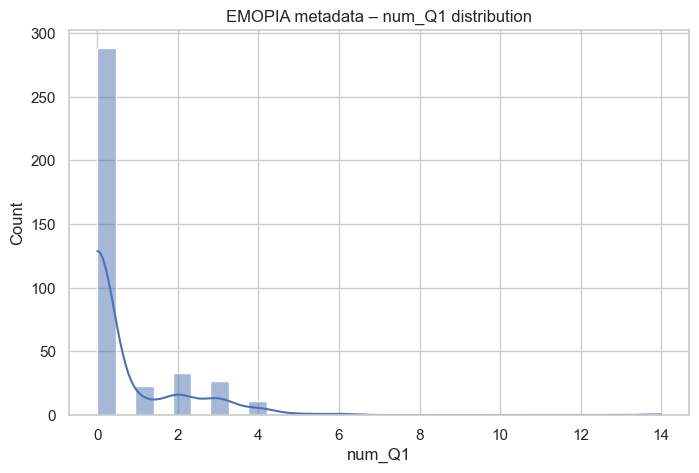

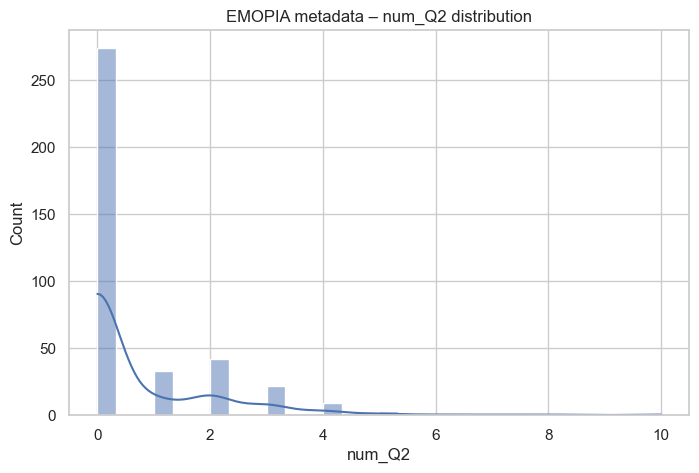

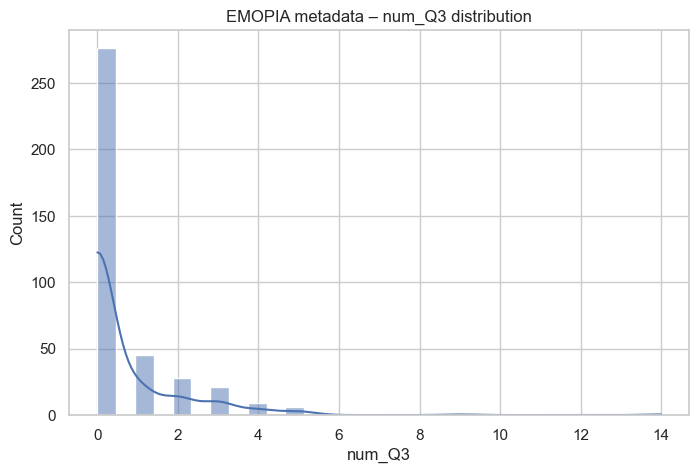

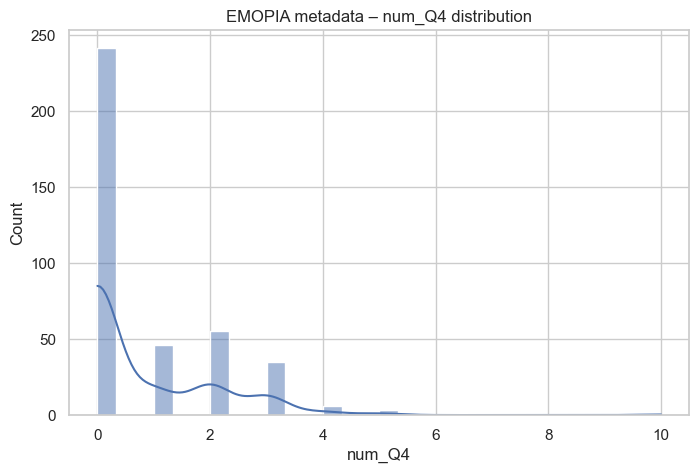

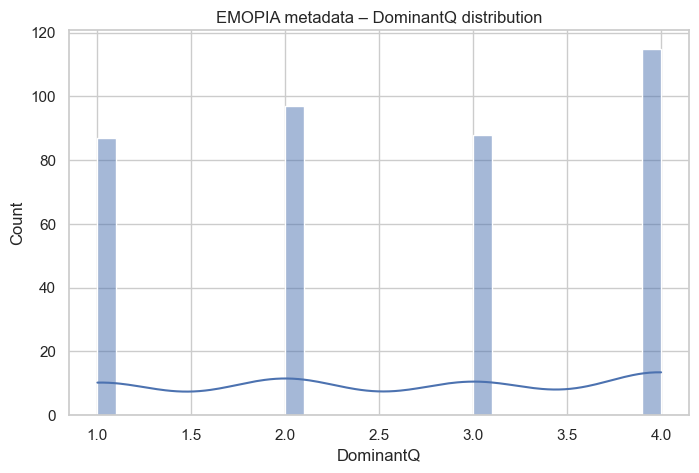

In [11]:
numeric_cols = emopia_metadata.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns in EMOPIA metadata:", numeric_cols)

for col in numeric_cols:
    plt.figure()
    sns.histplot(emopia_metadata[col], bins=30, kde=True)
    plt.title(f"EMOPIA metadata – {col} distribution")
    plt.show()

In [12]:
for col in ["key", "mode", "genre"]:
    if col in emopia_metadata.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=emopia_metadata, x=col, order=emopia_metadata[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"EMOPIA metadata – {col} distribution")
        plt.show()

In [13]:
# Try to find a common key
common_keys = list(set(emopia_labels.columns) & set(emopia_metadata.columns))
print("Common columns between label.csv and metadata_by_song.csv:", common_keys)

# Prefer songID if available
if "songID" in common_keys:
    merge_key = "songID"
elif "song_id" in common_keys:
    merge_key = "song_id"
else:
    merge_key = common_keys[0] if common_keys else None

print("Using merge key:", merge_key)

if merge_key is not None:
    emopia_full = emopia_labels.merge(emopia_metadata, on=merge_key, how="left", suffixes=("_clip", "_song"))
    print("Merged EMOPIA shape:", emopia_full.shape)
else:
    emopia_full = None

Common columns between label.csv and metadata_by_song.csv: []
Using merge key: None


In [14]:
if emopia_full is not None and "4Q" in emopia_full.columns:
    # Numeric columns (excluding obvious IDs)
    num_cols = [c for c in emopia_full.select_dtypes(include=[np.number]).columns
                if not any(tok in c.lower() for tok in ["id", "index"])]

    print("Numeric columns to compare with 4Q:", num_cols)

    for col in num_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=emopia_full, x="4Q", y=col)
        plt.title(f"{col} vs 4Q Emotion (EMOPIA)")
        plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    corr = emopia_full[num_cols].corr()
    sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
    plt.title("Correlation between numeric features (EMOPIA merged)")
    plt.show()

In [15]:
maestro_df.head()

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508


In [16]:
print(maestro_df.info())
display(maestro_df.describe(include="number"))
display(maestro_df.describe(include="object"))

print("Missing values per column:")
print(maestro_df.isna().sum())

print("\nDuplicate full rows:", maestro_df.duplicated().sum())
if "midi_filename" in maestro_df.columns:
    print("Duplicate MIDI filenames:", maestro_df["midi_filename"].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   canonical_composer  1276 non-null   object 
 1   canonical_title     1276 non-null   object 
 2   split               1276 non-null   object 
 3   year                1276 non-null   int64  
 4   midi_filename       1276 non-null   object 
 5   audio_filename      1276 non-null   object 
 6   duration            1276 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 69.9+ KB
None


,year,duration
count,1276.000000,1276.000000
mean,2011.302508,560.463595
std,4.353338,443.057431
min,2004.000000,45.155208
25%,2008.000000,261.981576
50%,2011.000000,429.168241
75%,2015.000000,685.018817
max,2018.000000,2624.663508


,canonical_composer,canonical_title,split,midi_filename,audio_filename
count,1276,1276,1276,1276,1276
unique,60,854,3,1276,1276
top,Frédéric Chopin,"Thirty-Two Variations in C Minor, WoO 80",train,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...
freq,201,18,962,1,1


Missing values per column:
canonical_composer    0
canonical_title       0
split                 0
year                  0
midi_filename         0
audio_filename        0
duration              0
dtype: int64

Duplicate full rows: 0
Duplicate MIDI filenames: 0


split
train         962
test          177
validation    137
Name: count, dtype: int64


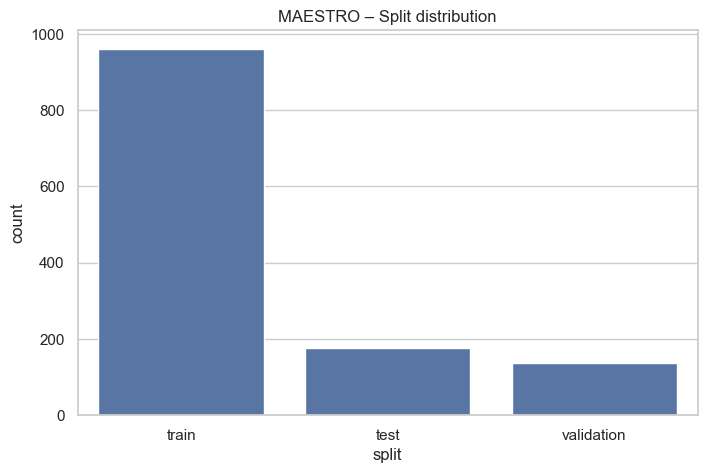

In [17]:
if "split" in maestro_df.columns:
    split_counts = maestro_df["split"].value_counts()
    print(split_counts)

    plt.figure()
    sns.countplot(data=maestro_df, x="split", order=split_counts.index)
    plt.title("MAESTRO – Split distribution")
    plt.show()

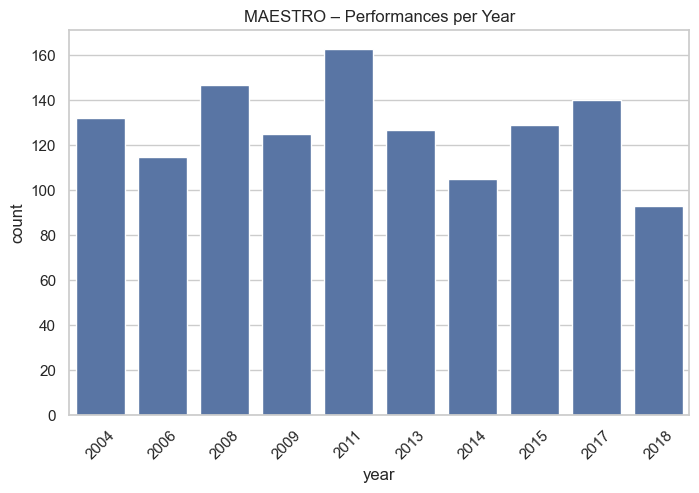

In [18]:
if "year" in maestro_df.columns:
    plt.figure()
    sns.countplot(data=maestro_df, x="year",
                  order=sorted(maestro_df["year"].dropna().unique()))
    plt.title("MAESTRO – Performances per Year")
    plt.xticks(rotation=45)
    plt.show()

count    1276.000000
mean      560.463595
std       443.057431
min        45.155208
25%       261.981576
50%       429.168241
75%       685.018817
max      2624.663508
Name: duration, dtype: float64


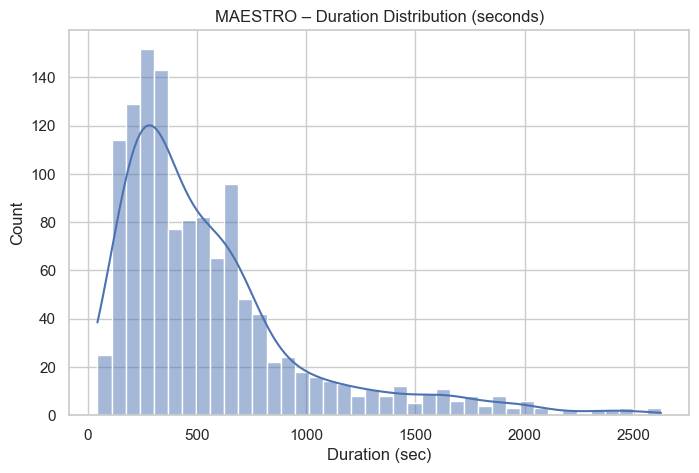

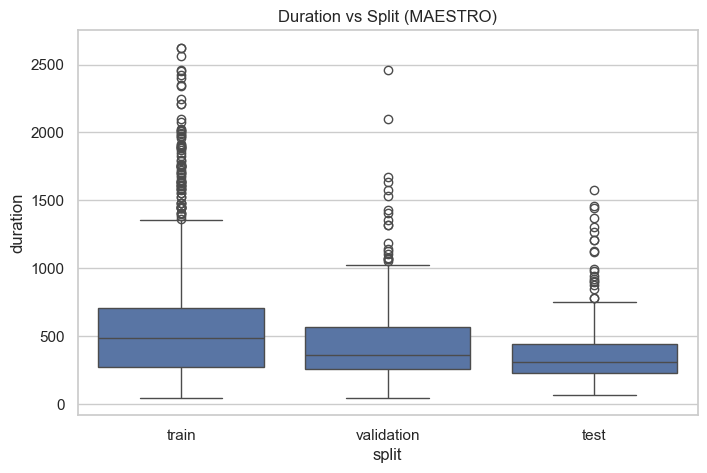

In [19]:
if "duration" in maestro_df.columns:
    print(maestro_df["duration"].describe())

    plt.figure()
    sns.histplot(maestro_df["duration"], bins=40, kde=True)
    plt.title("MAESTRO – Duration Distribution (seconds)")
    plt.xlabel("Duration (sec)")
    plt.show()

    if "split" in maestro_df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=maestro_df, x="split", y="duration")
        plt.title("Duration vs Split (MAESTRO)")
        plt.show()

Total unique composers: 60
Top 15 composers:
canonical_composer
Frédéric Chopin                 201
Franz Schubert                  186
Ludwig van Beethoven            146
Johann Sebastian Bach           145
Franz Liszt                     131
Sergei Rachmaninoff              59
Robert Schumann                  49
Claude Debussy                   45
Joseph Haydn                     40
Wolfgang Amadeus Mozart          38
Alexander Scriabin               35
Domenico Scarlatti               31
Felix Mendelssohn                28
Johannes Brahms                  26
Franz Schubert / Franz Liszt     10
Name: count, dtype: int64


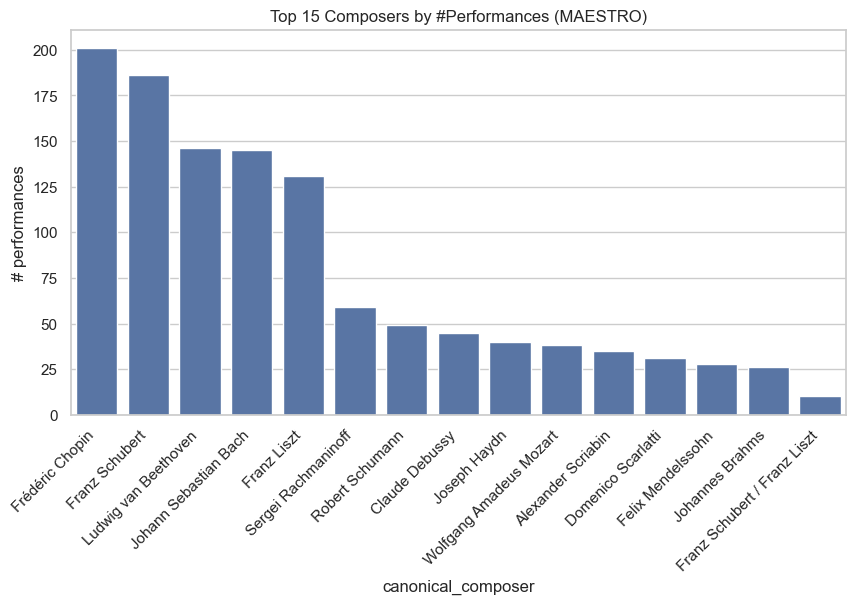


Top 15 composers by total duration (hours):
canonical_composer
Franz Schubert             35.82
Ludwig van Beethoven       26.92
Frédéric Chopin            26.22
Franz Liszt                20.27
Robert Schumann            15.72
Johann Sebastian Bach      13.77
Johannes Brahms             8.06
Sergei Rachmaninoff         6.66
Claude Debussy              5.97
Wolfgang Amadeus Mozart     5.60
Alexander Scriabin          5.35
Felix Mendelssohn           4.85
Joseph Haydn                4.72
Modest Mussorgsky           3.17
Domenico Scarlatti          1.71
Name: duration, dtype: float64


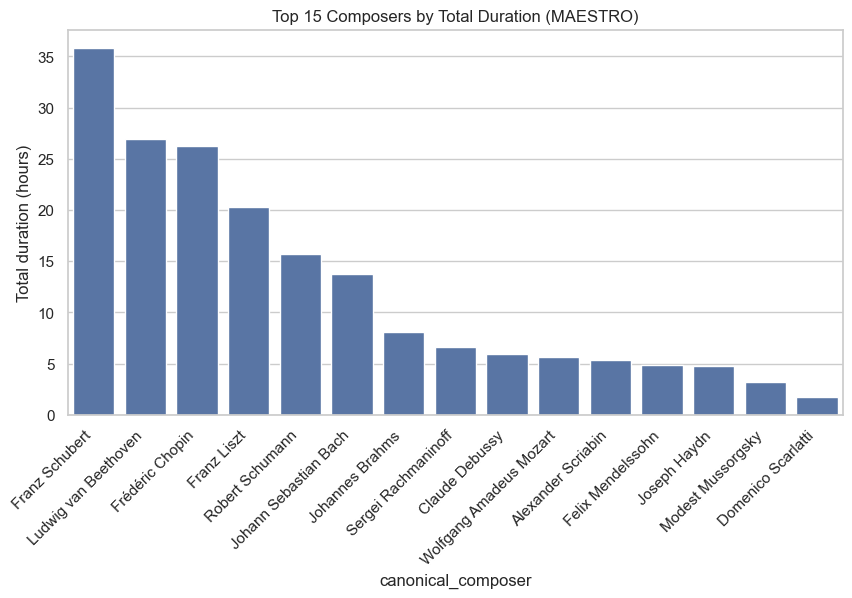

In [20]:
if "canonical_composer" in maestro_df.columns:
    composer_counts = maestro_df["canonical_composer"].value_counts()
    print("Total unique composers:", composer_counts.shape[0])
    print("Top 15 composers:")
    print(composer_counts.head(15))

    plt.figure(figsize=(10, 5))
    sns.barplot(x=composer_counts.head(15).index,
                y=composer_counts.head(15).values)
    plt.xticks(rotation=45, ha="right")
    plt.title("Top 15 Composers by #Performances (MAESTRO)")
    plt.ylabel("# performances")
    plt.show()

    if "duration" in maestro_df.columns:
        composer_dur = maestro_df.groupby("canonical_composer")["duration"].sum().sort_values(ascending=False)
        print("\nTop 15 composers by total duration (hours):")
        print((composer_dur.head(15) / 3600).round(2))

        plt.figure(figsize=(10, 5))
        sns.barplot(x=composer_dur.head(15).index, y=(composer_dur.head(15).values / 3600))
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Total duration (hours)")
        plt.title("Top 15 Composers by Total Duration (MAESTRO)")
        plt.show()

In [21]:
if has_fma:
    print("FMA tracks info:")
    print(fma_tracks.info())
    print("\nMissing values per column (tracks):")
    print(fma_tracks.isna().sum().head(30))

    # Genre hierarchy
    print("\nFMA genres head:")
    display(fma_genres.head())

    # Example: top-20 genres
    if ("genre_top" in fma_tracks.columns):
        genre_counts = fma_tracks["genre_top"].value_counts()
        print("Top 20 genres:")
        print(genre_counts.head(20))

        plt.figure(figsize=(10, 5))
        sns.barplot(x=genre_counts.head(20).index, y=genre_counts.head(20).values)
        plt.xticks(rotation=45, ha="right")
        plt.title("Top 20 Genres (FMA)")
        plt.show()

    # Numeric features (e.g., in features.csv)
    num_cols = fma_features.select_dtypes(include=[np.number]).columns.tolist()
    print("FMA numeric feature columns example:", num_cols[:15])

    # Correlation heatmap of a subset
    subset = num_cols[:20]  # avoid giant plot
    plt.figure(figsize=(12, 10))
    sns.heatmap(fma_features[subset].corr(), cmap="coolwarm", center=0)
    plt.title("FMA – Correlation of first 20 numeric features")
    plt.show()

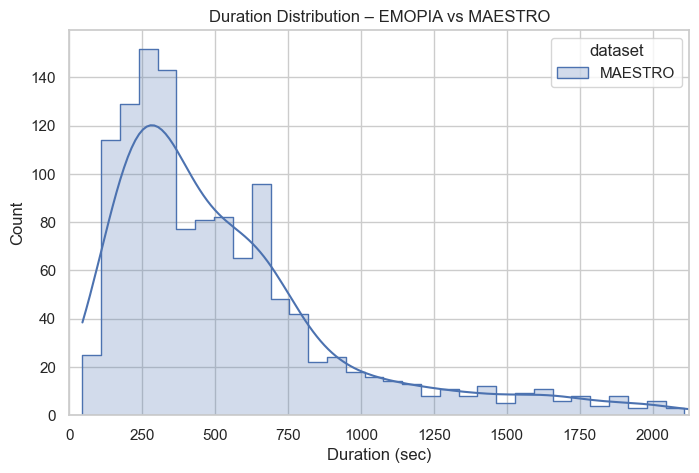

In [22]:
duration_df = []

if "clip_duration" in emopia_labels.columns:
    duration_df.append(
        pd.DataFrame({"duration_sec": emopia_labels["clip_duration"],
                      "dataset": "EMOPIA_clip"})
    )

if "duration" in maestro_df.columns:
    duration_df.append(
        pd.DataFrame({"duration_sec": maestro_df["duration"],
                      "dataset": "MAESTRO"})
    )

if duration_df:
    duration_all = pd.concat(duration_df, ignore_index=True)
    plt.figure(figsize=(8, 5))
    sns.histplot(data=duration_all, x="duration_sec", hue="dataset",
                 bins=40, kde=True, element="step")
    plt.xlim(0, duration_all["duration_sec"].quantile(0.99))  # cut extreme tail
    plt.title("Duration Distribution – EMOPIA vs MAESTRO")
    plt.xlabel("Duration (sec)")
    plt.show()

=== Shapes ===
EMOPIA labels: (1078, 3)
EMOPIA metadata: (387, 6)
MAESTRO: (1276, 7)


===== EMOPIA LABELS: BASIC INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1078 non-null   object
 1   4Q         1078 non-null   int64 
 2   annotator  1078 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.4+ KB
None

Head:
                 ID  4Q annotator
0  Q1_0vLPYiPN7qY_0   1         D
1  Q1_0vLPYiPN7qY_1   1         D
2  Q1_0vLPYiPN7qY_2   1         D
3  Q1_1Qc15G0ZHIg_1   1         D
4  Q1_1Qc15G0ZHIg_2   1         D

Describe (numeric):
     count      mean       std  min  25%  50%  75%  max
4Q  1078.0  2.577922  1.133173  1.0  2.0  3.0  4.0  4.0

Missing values (%):
Series([], dtype: float64)


===== EMOPIA METADATA: BASIC INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns

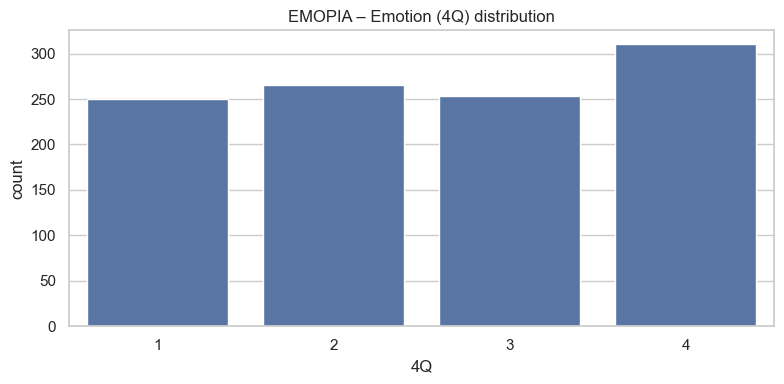

Using song column for EMOPIA metadata: songID

EMOPIA – Clips per song summary:
count    387.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: n_clips, dtype: float64


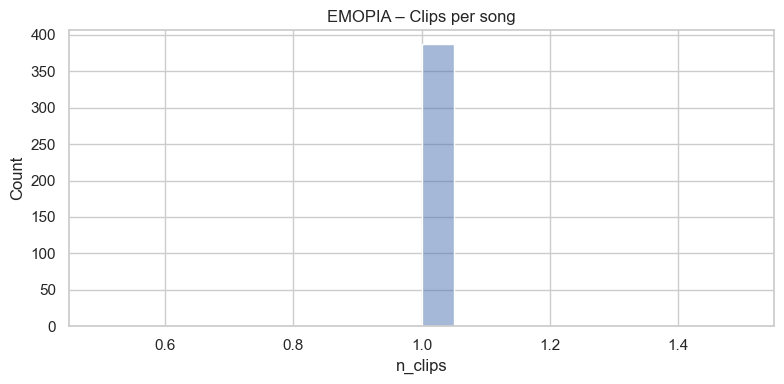

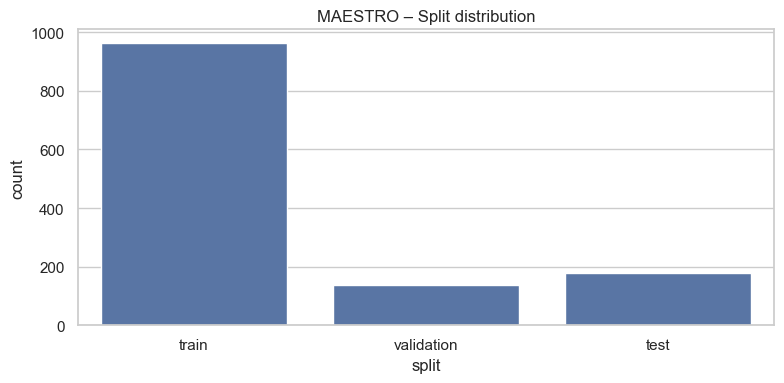


Using duration column for MAESTRO: duration


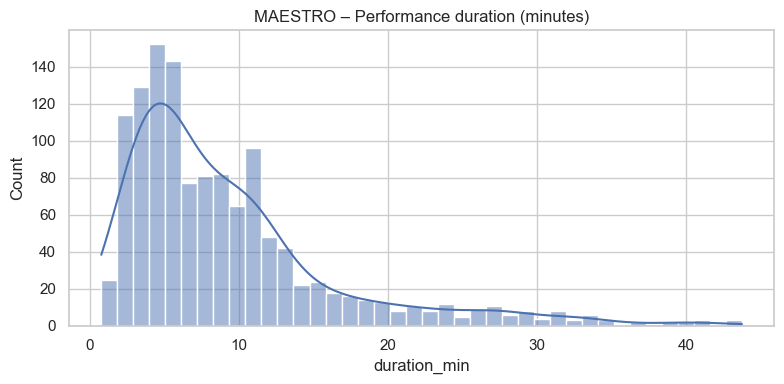

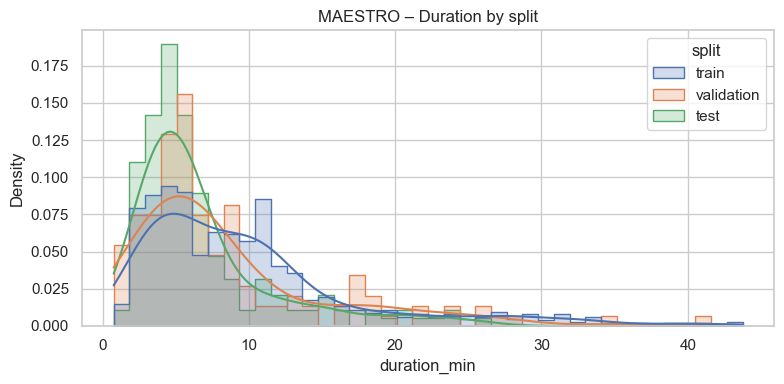


Using composer column for MAESTRO: canonical_composer

Top 15 composers by # performances:
canonical_composer
Frédéric Chopin                 201
Franz Schubert                  186
Ludwig van Beethoven            146
Johann Sebastian Bach           145
Franz Liszt                     131
Sergei Rachmaninoff              59
Robert Schumann                  49
Claude Debussy                   45
Joseph Haydn                     40
Wolfgang Amadeus Mozart          38
Alexander Scriabin               35
Domenico Scarlatti               31
Felix Mendelssohn                28
Johannes Brahms                  26
Franz Schubert / Franz Liszt     10
Name: count, dtype: int64


/var/folders/w3/y94gskkx7x94zx_nd4z757qw0000gn/T/ipykernel_55801/2926315378.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


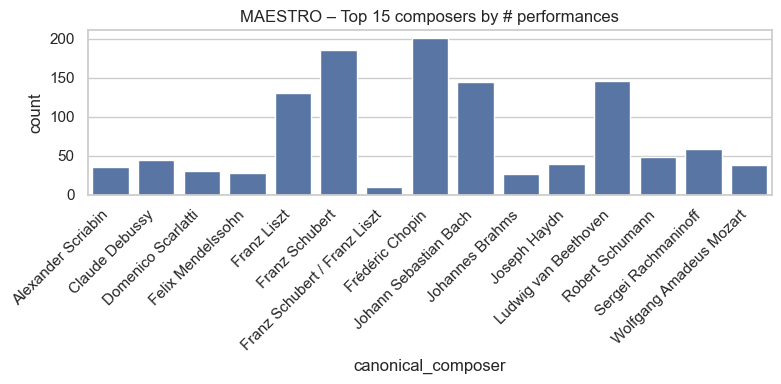

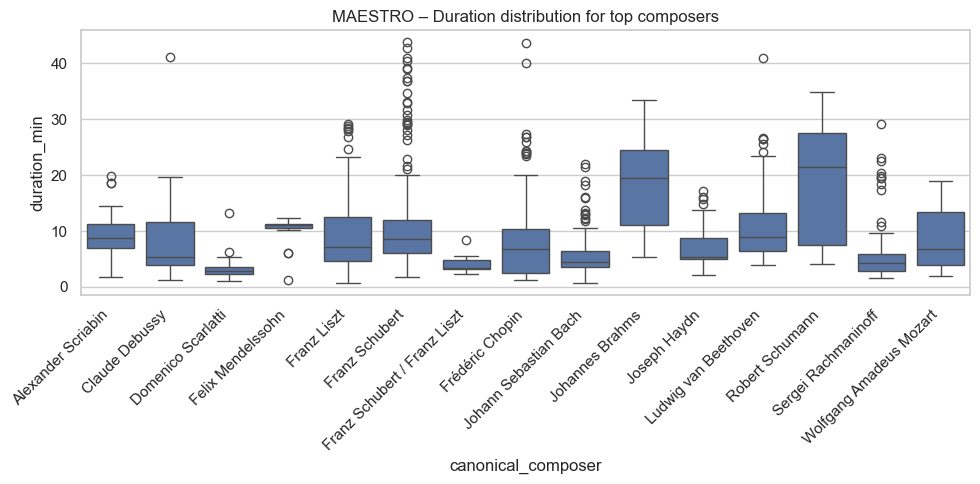


Using year column for MAESTRO: year


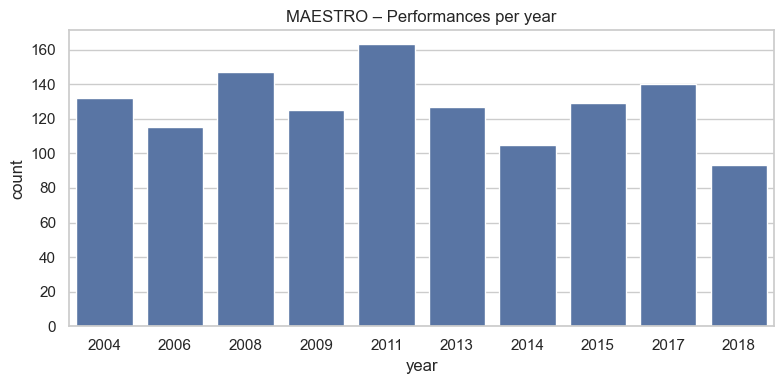

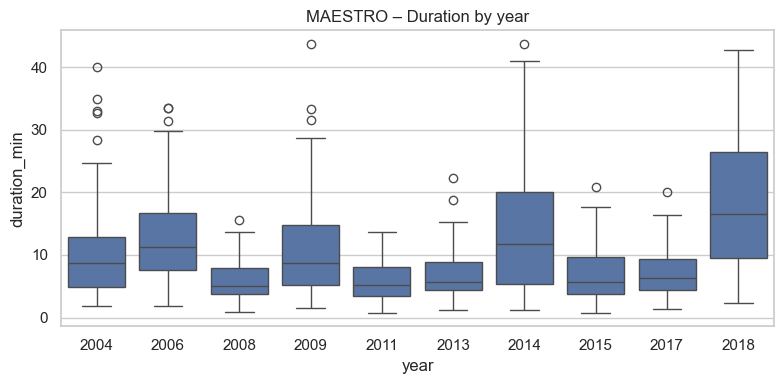

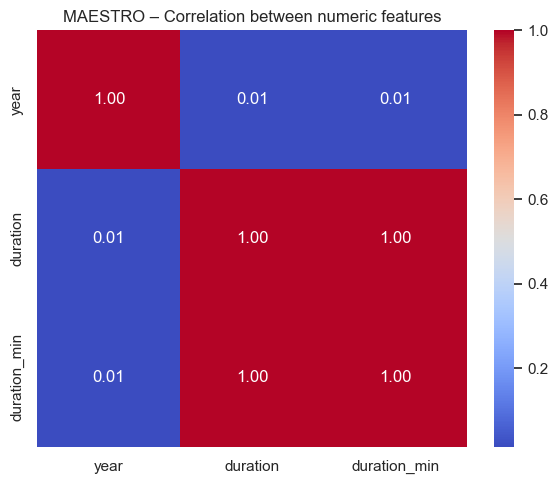

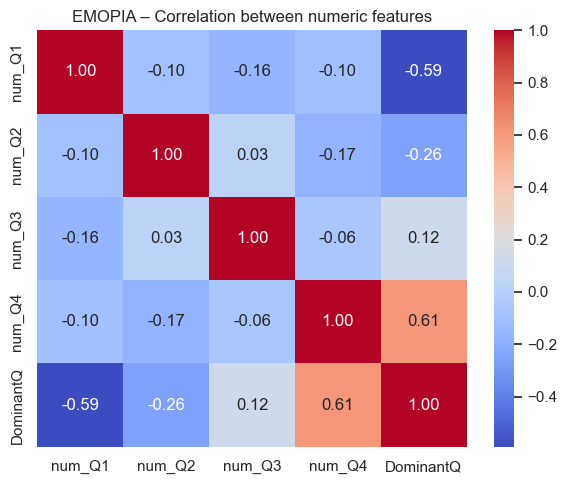


EDA plots generated. Tweak column name guesses if anything failed.


In [23]:
# ============================================
# All-in-one EDA for EMOPIA + MAESTRO
# ============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plot style ---
plt.style.use("default")
sns.set_theme(context="notebook", style="whitegrid")

# -----------------------------
# 1. Load data
# -----------------------------

# Adjust these paths to match your project
EMOPIA_LABEL_PATH = "EMOPIA_1.0/label.csv"
EMOPIA_META_PATH  = "EMOPIA_1.0/metadata_by_song.csv"
MAESTRO_PATH      = "maestro-v3.0.0.csv"

emopia_labels  = pd.read_csv(EMOPIA_LABEL_PATH)
emopia_meta    = pd.read_csv(EMOPIA_META_PATH)
maestro_df     = pd.read_csv(MAESTRO_PATH)

print("=== Shapes ===")
print(f"EMOPIA labels: {emopia_labels.shape}")
print(f"EMOPIA metadata: {emopia_meta.shape}")
print(f"MAESTRO: {maestro_df.shape}")

# -----------------------------
# 2. Basic info & missingness
# -----------------------------

def basic_overview(df, name):
    print(f"\n\n===== {name}: BASIC INFO =====")
    print(df.info())
    print("\nHead:")
    print(df.head())
    print("\nDescribe (numeric):")
    print(df.describe().T)
    print("\nMissing values (%):")
    missing = df.isna().mean() * 100
    print(missing[missing > 0].sort_values(ascending=False))

basic_overview(emopia_labels, "EMOPIA LABELS")
basic_overview(emopia_meta,   "EMOPIA METADATA")
basic_overview(maestro_df,    "MAESTRO")

# -----------------------------
# 3. Helper plotting functions
# -----------------------------

def plot_categorical_counts(df, col, hue=None, top_n=None, title=None, rotate_xticks=True):
    data = df.copy()
    if top_n is not None:
        top_vals = data[col].value_counts().nlargest(top_n).index
        data = data[data[col].isin(top_vals)]
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=data, x=col, hue=hue)
    if rotate_xticks:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.title(title or f"{col} distribution")
    plt.tight_layout()
    plt.show()

def plot_numeric_hist(df, col, bins=30, by=None, title=None):
    plt.figure(figsize=(8, 4))
    if by is None:
        sns.histplot(data=df, x=col, bins=bins, kde=True)
    else:
        sns.histplot(data=df, x=col, bins=bins, kde=True, hue=by, element="step", stat="density", common_norm=False)
    plt.title(title or f"{col} distribution")
    plt.tight_layout()
    plt.show()

def plot_box_by_category(df, numeric_col, cat_col, title=None):
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=cat_col, y=numeric_col)
    plt.title(title or f"{numeric_col} by {cat_col}")
    plt.tight_layout()
    plt.show()

# -----------------------------
# 4. EMOPIA – clip-level EDA
# -----------------------------

# NOTE: adapt these column names to your actual CSV.
# Common EMOPIA-style columns:
#   emo_class / 4Q : emotion label (1–4)
#   YouTube_ID / track_id / song_id : song-level id
#   seg_id / clip_id : segment id
#   split : train / valid / test (if present)
#   start_time / end_time or clip_duration: segment duration

# Try to guess emotion column
emo_col_candidates = [c for c in emopia_labels.columns 
                      if c.lower() in {"emo_class", "emotion", "4q", "label"}]
if len(emo_col_candidates) == 0:
    raise ValueError("Could not find emotion column in EMOPIA labels – please rename manually.")
EMO_COL = emo_col_candidates[0]

print(f"\nUsing emotion column for EMOPIA: {EMO_COL}")

# 4.1 Emotion distribution
plot_categorical_counts(
    emopia_labels, 
    col=EMO_COL,
    title="EMOPIA – Emotion (4Q) distribution",
    rotate_xticks=False
)

# 4.2 Split distribution (if exists)
split_col_candidates = [c for c in emopia_labels.columns 
                        if c.lower() in {"split", "set", "subset"}]
if split_col_candidates:
    SPLIT_COL = split_col_candidates[0]
    print(f"Using split column for EMOPIA: {SPLIT_COL}")
    plot_categorical_counts(
        emopia_labels,
        col=SPLIT_COL,
        title="EMOPIA – Split distribution",
        rotate_xticks=False
    )
    # Emotion x split heatmap (counts)
    ct = pd.crosstab(emopia_labels[SPLIT_COL], emopia_labels[EMO_COL])
    plt.figure(figsize=(6, 4))
    sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
    plt.title("EMOPIA – Emotion vs Split (counts)")
    plt.tight_layout()
    plt.show()

# 4.3 Clips per song
song_col_candidates = [c for c in emopia_meta.columns 
                       if "song" in c.lower() or "track" in c.lower() or "youtube" in c.lower()]
if song_col_candidates:
    SONG_COL = song_col_candidates[0]
    print(f"Using song column for EMOPIA metadata: {SONG_COL}")
    
    clips_per_song = emopia_meta.groupby(SONG_COL).size().rename("n_clips").reset_index()
    print("\nEMOPIA – Clips per song summary:")
    print(clips_per_song["n_clips"].describe())

    plot_numeric_hist(
        clips_per_song, 
        col="n_clips", 
        bins=20, 
        title="EMOPIA – Clips per song"
    )

# 4.4 Clip duration distribution (if available)
duration_cols = [c for c in emopia_meta.columns 
                 if "dur" in c.lower() or "length" in c.lower() or "seconds" in c.lower()]
if duration_cols:
    DUR_COL = duration_cols[0]
    print(f"Using duration column for EMOPIA metadata: {DUR_COL}")
    plot_numeric_hist(
        emopia_meta, 
        col=DUR_COL,
        bins=30,
        title="EMOPIA – Clip duration distribution"
    )
    if emo_col_candidates and EMO_COL in emopia_meta.columns:
        plot_box_by_category(
            emopia_meta,
            numeric_col=DUR_COL,
            cat_col=EMO_COL,
            title="EMOPIA – Clip duration by emotion"
        )

# -----------------------------
# 5. MAESTRO – performance-level EDA
# -----------------------------

# Expected columns from official MAESTRO metadata:
#   canonical_composer, canonical_title, split, year, duration, midi_filename, audio_filename
# (duration is in seconds)

# 5.1 Split distribution
if "split" in maestro_df.columns:
    plot_categorical_counts(
        maestro_df,
        col="split",
        title="MAESTRO – Split distribution",
        rotate_xticks=False
    )

# 5.2 Duration distribution (overall & by split)
duration_col = None
for c in maestro_df.columns:
    if "dur" in c.lower():
        duration_col = c
        break

if duration_col:
    print(f"\nUsing duration column for MAESTRO: {duration_col}")
    maestro_df["duration_min"] = maestro_df[duration_col] / 60.0

    plot_numeric_hist(
        maestro_df, 
        col="duration_min", 
        bins=40,
        title="MAESTRO – Performance duration (minutes)"
    )

    if "split" in maestro_df.columns:
        plot_numeric_hist(
            maestro_df,
            col="duration_min",
            bins=40,
            by="split",
            title="MAESTRO – Duration by split"
        )

# 5.3 Composer statistics
composer_col_candidates = [c for c in maestro_df.columns 
                           if "composer" in c.lower()]
if composer_col_candidates:
    COMP_COL = composer_col_candidates[0]
    print(f"\nUsing composer column for MAESTRO: {COMP_COL}")

    top_composers = maestro_df[COMP_COL].value_counts().head(15)
    print("\nTop 15 composers by # performances:")
    print(top_composers)

    plot_categorical_counts(
        maestro_df,
        col=COMP_COL,
        top_n=15,
        title="MAESTRO – Top 15 composers by # performances"
    )

    # Duration by top composers
    top_comp_names = top_composers.index
    maestro_top_comp = maestro_df[maestro_df[COMP_COL].isin(top_comp_names)].copy()
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        data=maestro_top_comp,
        x=COMP_COL,
        y="duration_min"
    )
    plt.xticks(rotation=45, ha="right")
    plt.title("MAESTRO – Duration distribution for top composers")
    plt.tight_layout()
    plt.show()

# 5.4 Year statistics (if available)
year_col_candidates = [c for c in maestro_df.columns if "year" in c.lower()]
if year_col_candidates:
    YEAR_COL = year_col_candidates[0]
    print(f"\nUsing year column for MAESTRO: {YEAR_COL}")
    plot_categorical_counts(
        maestro_df,
        col=YEAR_COL,
        title="MAESTRO – Performances per year",
        rotate_xticks=False
    )

    if duration_col:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=maestro_df, x=YEAR_COL, y="duration_min")
        plt.title("MAESTRO – Duration by year")
        plt.tight_layout()
        plt.show()

# -----------------------------
# 6. Correlation & joint views
# -----------------------------

# Numeric correlation for MAESTRO (duration, year, etc.)
numeric_cols_maestro = maestro_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols_maestro) > 1:
    plt.figure(figsize=(6, 5))
    sns.heatmap(maestro_df[numeric_cols_maestro].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("MAESTRO – Correlation between numeric features")
    plt.tight_layout()
    plt.show()

# If EMOPIA metadata has multiple numeric features, plot their correlation too
numeric_cols_emopia = emopia_meta.select_dtypes(include=[np.number]).columns
if len(numeric_cols_emopia) > 1:
    plt.figure(figsize=(6, 5))
    sns.heatmap(emopia_meta[numeric_cols_emopia].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("EMOPIA – Correlation between numeric features")
    plt.tight_layout()
    plt.show()

print("\nEDA plots generated. Tweak column name guesses if anything failed.")
